<h1>Classification Object Using Transfer Learning (InceptionResNetV2)<h1>

All Classes of ImageNet API: https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import Image as show_image
from keras._tf_keras.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras._tf_keras.keras.preprocessing import image
from keras._tf_keras.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

In [4]:
#Load image and rescale it to the resolution of 299x299 which the model requires
img = Image.open("SCar.jpeg").resize((299,299))

In [5]:
#Conver it to array for operations
img = np.array(img)

In [6]:
#Check shape
img.shape

(299, 299, 3)

In [7]:
#Dimensions of the img
print(img.ndim)

3


In [8]:
#Model requires 4 dimension
img = img.reshape(-1, 299, 299,3)

In [9]:
#Check again
img.shape

(1, 299, 299, 3)

In [10]:
print(img.ndim)

4


In [11]:
#Scale input pixels between -1 and 1
img = preprocess_input(img)

In [12]:
#Load up the model itself
model = InceptionResNetV2(weights='imagenet', classes=1000)

225209952/225209952 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


In [13]:
#Look layers
print(model.summary())
print(type(model))

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 55,873,736 (213.14 MB)

 Trainable params: 55,813,192 (212.91 MB)

 Non-trainable params: 60,544 (236.50 KB)

None
<class 'keras.src.models.functional.Functional'>


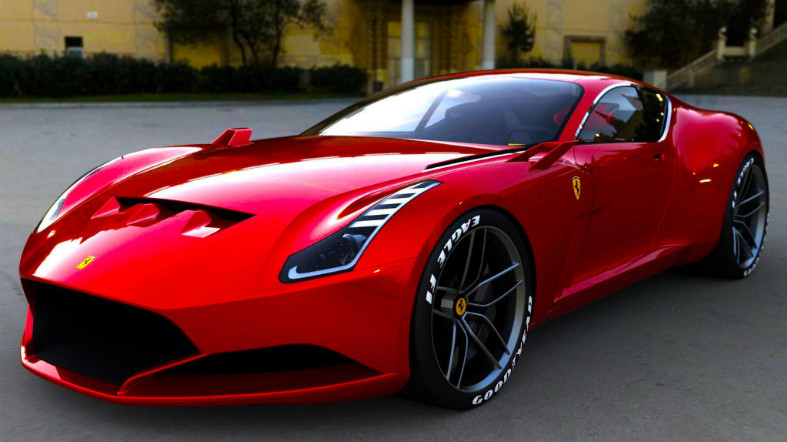

In [15]:
#Before prediction see the img
show_image(filename="SCar.jpeg")

In [17]:
preds = model.predict(img)
#top2
print('predicted categories: ', decode_predictions(preds, top=2)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
predicted categories:  [('n04285008', 'sports_car', 0.88161635), ('n04037443', 'racer', 0.034366354)]
